Network Properties:
nodes, edges			200, 1910
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.095980
min/max/avg degree		10, 71, 19.100000
degree assortativity		0.311886
number of connected components	1
size of largest component	200 (100.00 %)


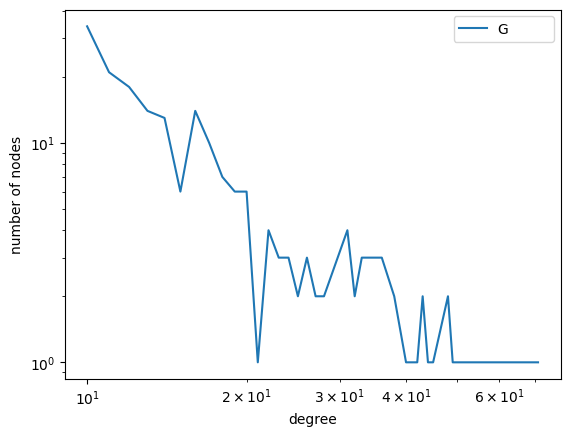

In [6]:
import networkit as nk
import numpy
import matplotlib.pyplot as plt

# G = nk.generators.ErdosRenyiGenerator(200, 0.2)
G = nk.generators.BarabasiAlbertGenerator(10, 200)
# G = nk.generators.ErdosRenyiGenerator(200, 0.2)
# Run algorithm
G = G.generate()
nk.overview(G)

# dataset_name = "ErdosRenyi200"
# G = nk.readGraph(f"data/{dataset_name}/raw/uduw.el", nk.Format.EdgeListSpaceZero)
# erMinGraph = nk.readGraph(f"data/{dataset_name}/pruned/er_min/0.8/uduw.el", nk.Format.EdgeListSpaceZero)
# erMaxGraph = nk.readGraph(f"data/{dataset_name}/pruned/er_max/0.8/uduw.el", nk.Format.EdgeListSpaceZero)
# spanningGraph = nk.graph.SpanningForest(G).run().getForest()
# fireGraph = nk.readGraph(f"data/{dataset_name}/pruned/forestfire/0.2/uduw.el", nk.Format.EdgeListSpaceZero)
# localDegGraph = nk.readGraph(f"data/{dataset_name}/pruned/localdeg/0.2/uduw.el", nk.Format.EdgeListSpaceZero)
# similarityGraph = nk.readGraph(f"data/{dataset_name}/pruned/similarity/0.2/uduw.el", nk.Format.EdgeListSpaceZero)
# randomGraph = nk.readGraph(f"data/{dataset_name}/pruned/random/0.2/uduw.el", nk.Format.EdgeListSpaceZero)
# scanGraph = nk.readGraph(f"data/{dataset_name}/pruned/scan/0.2/uduw.el", nk.Format.EdgeListSpaceZero)
# simmelieanGraph = nk.readGraph(f"data/{dataset_name}/pruned/simmelian/0.2/uduw.el", nk.Format.EdgeListSpaceZero)
# jacardGraph = nk.readGraph(f"data/{dataset_name}/pruned/jaccard/0.2/uduw.el", nk.Format.EdgeListSpaceZero)
# spanner_3 = nk.readGraph(f"data/{dataset_name}/pruned/spanner-3/uduw.el", nk.Format.EdgeListSpaceZero)
# spanner_5 = nk.readGraph(f"data/{dataset_name}/pruned/spanner-5/uduw.el", nk.Format.EdgeListSpaceZero)
# spanner_7 = nk.readGraph(f"data/{dataset_name}/pruned/spanner-7/uduw.el", nk.Format.EdgeListSpaceZero)

plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")

for name, Graph in {"G         ": G}.items():
# for name, Graph in {"G         ": G, 
#                     "erMinGraph   ": erMinGraph, 
#                     "erMaxGraph   ": erMaxGraph, 
#                     "spanner_3": spanner_3,
#                     "spanner_5": spanner_5,
#                     "spanner_7": spanner_7,
#                     "spanningGraph": spanningGraph, 
#                     "fireGraph": fireGraph, 
#                     "localDegGraph": localDegGraph, 
#                     "similarityGraph": similarityGraph, 
#                     "randomGraph": randomGraph, 
#                     "scanGraph": scanGraph, 
#                     "simmelieanGraph": simmelieanGraph, 
#                     "jacardGraph": jacardGraph}.items():
    dd = sorted(nk.centrality.DegreeCentrality(Graph).run().scores(), reverse=True)
    degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
    plt.plot(degrees, numberOfNodes, label=name)
plt.legend()
plt.savefig("degreeDistribution.png")
    

In [14]:
for name, Graph in {"G         ": G, 
                    "erMinGraph   ": erMinGraph, 
                    "erMaxGraph   ": erMaxGraph, 
                    "spanner_3": spanner_3,
                    "spanner_5": spanner_5,
                    "spanner_7": spanner_7,
                    "spanningGraph": spanningGraph, 
                    "fireGraph": fireGraph, 
                    "localDegGraph": localDegGraph, 
                    "similarityGraph": similarityGraph, 
                    "randomGraph": randomGraph, 
                    "scanGraph": scanGraph, 
                    "simmelieanGraph": simmelieanGraph, 
                    "jacardGraph": jacardGraph}.items():
    communities = nk.community.detectCommunities(Graph)
    print(nk.community.Modularity().getQuality(communities, Graph))
    print()

Communities detected in 0.97952 [s]
solution properties:
-------------------  ------------
# communities         1160
min community size       2
max community size    4508
avg. community size     31.631
imbalance              140.875
edge cut             51270
edge cut (portion)       0.278897
modularity               0.618711
-------------------  ------------
0.6187112671051306

Communities detected in 0.74005 [s]
solution properties:
-------------------  ------------
# communities        29053
min community size       1
max community size    1146
avg. community size      1.26238
imbalance              573
edge cut             39908.8
edge cut (portion)       1.08575
modularity               0.711258
-------------------  ------------
0.7112584919606844

Communities detected in 0.60682 [s]
solution properties:
-------------------  ------------
# communities         7837
min community size       1
max community size    1067
avg. community size      4.68189
imbalance              213.4
e

In [3]:
nk.profiling.Profile.create(G).show()

/home/chenyh/local/miniconda3/envs/pyg/lib/python3.9/site-packages/networkit/stopwatch.py:49: UserWarning: networkit.Timer is deprecated, will be removed in future updates.
  warn("networkit.Timer is deprecated, will be removed in future updates.")
/home/chenyh/local/miniconda3/envs/pyg/lib/python3.9/site-packages/networkit/profiling/plot.py:273: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(showGrid, which="both", color=theme.getGridColor(), linestyle="-")
/home/chenyh/local/miniconda3/envs/pyg/lib/python3.9/site-packages/networkit/profiling/plot.py:188: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


Network Structural Profile 
 
	<!--- HELP --->
 Navigating the profile 
 
 the profile includes the following sections by default: 
 
 global properties 
 overview of node centrality and partition distributions 
 detail views of node centrality distributions 
 node centrality correlations 
 detail views of partitions 
 
 click [+] for descriptions of measures 
 click on distribution thumbnail for detail view 
 hover over variable name of statistical figures for explanation 
 click on distribution plot for larger view 
 
 
	<!--- END HELP --->
 
 36692 
 183831 
 0.000273098 
 False 
 False 
 0 
 (13, 14) 
 N/A 
 1065 
 
 
 
 <img src="data:image/svg+xml;utf8,%3Csvg%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22288pt%22%20height%3D%22180pt%22%20viewBox%3D%220%200%20288%20180%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20version%3D%221.1%22%3E%20%3Cmetadata%3E%20%3Crdf%3ARDF%20xmlns%3Adc%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%22%20xmlns%3Acc%3D%22http%3A%2F%2Fcreativecommons.org%2Fns%23%22%20xmlns%3Ardf%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%22%3E%20%3Ccc%3AWork%3E%20%3Cdc%3Atype%20rdf%3Aresource%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Fdcmitype%2FStillImage%22%2F%3E%20%3Cdc%3Adate%3E2023-01-24T11%3A07%3A49.508355%3C%2Fdc%3Adate%3E%20%3Cdc%3Aformat%3Eimage%2Fsvg%2Bxml%3C%2Fdc%3Aformat%3E%20%3Cdc%3Acreator%3E%20%3Ccc%3AAgent%3E%20%3Cdc%3Atitle%3EMatplotlib%20v3.5.2%2C%20https%3A%2F%2Fmatplotlib.org%2F%3C%2Fdc%3Atitle%3E%20%3C%2Fcc%3AAgent%3E%20%3C%2Fdc%3Acreator%3E%20%3C%2Fcc%3AWork%3E%20%3C%2Frdf%3ARDF%3E%20%3C%2Fmetadata%3E%20%3Cdefs%3E%20%3Cstyle%20type%3D%22text%2Fcss%22%3E%2A%7Bstroke-linejoin%3A%20round%3B%20stroke-linecap%3A%20butt%7D%3C%2Fstyle%3E%20%3C%2Fdefs%3E%20%3Cg%20id%3D%22figure_1%22%3E%20%3Cg%20id%3D%22patch_1%22%3E%20%3Cpath%20d%3D%22M%200%20180%20L%20288%20180%20L%20288%200%20L%200%200%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22axes_1%22%3E%20%3Cg%20id%3D%22patch_2%22%3E%20%3Cpath%20d%3D%22M%2049.39%20135.728%20L%20263.12%20135.728%20L%20263.12%2010.8%20L%2049.39%2010.8%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_3%22%3E%20%3Cpath%20d%3D%22M%2057.305926%20135.728%20L%2067.200833%20135.728%20L%2067.200833%2015.604923%20L%2057.305926%2015.604923%20z%20%22%20clip-path%3D%22url%28%23p983d281b26%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_4%22%3E%20%3Cpath%20d%3D%22M%2067.200833%20135.728%20L%2077.095741%20135.728%20L%2077.095741%20133.903532%20L%2067.200833%20133.903532%20z%20%22%20clip-path%3D%22url%28%23p983d281b26%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_5%22%3E%20%3Cpath%20d%3D%22M%2077.095741%20135.728%20L%2086.990648%20135.728%20L%2086.990648%20135.22493%20L%2077.095741%20135.22493%20z%20%22%20clip-path%3D%22url%28%23p983d281b26%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_6%22%3E%20%3Cpath%20d%3D%22M%2086.990648%20135.728%20L%2096.885556%20135.728%20L%2096.885556%20135.483173%20L%2086.990648%20135.483173%20z%20%22%20clip-path%3D%22url%28%23p983d281b26%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_7%22%3E%20%3Cpath%20d%3D%22M%2096.885556%20135.728%20L%20106.780463%20135.728%20L%20106.780463%20135.583787%20L%2096.885556%20135.583787%20z%20%22%20clip-path%3D%22url%28%23p983d281b26%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20

In [16]:
nk.profiling.Profile.create(randomGraph).show()

Network Structural Profile 
 
	<!--- HELP --->
 Navigating the profile 
 
 the profile includes the following sections by default: 
 
 global properties 
 overview of node centrality and partition distributions 
 detail views of node centrality distributions 
 node centrality correlations 
 detail views of partitions 
 
 click [+] for descriptions of measures 
 click on distribution thumbnail for detail view 
 hover over variable name of statistical figures for explanation 
 click on distribution plot for larger view 
 
 
	<!--- END HELP --->
 
 36691 
 36567 
 5.43265e-05 
 False 
 False 
 0 
 (22, 22) 
 N/A 
 18887 
 
 
 
 <img src="data:image/svg+xml;utf8,%3Csvg%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22288pt%22%20height%3D%22180pt%22%20viewBox%3D%220%200%20288%20180%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20version%3D%221.1%22%3E%20%3Cmetadata%3E%20%3Crdf%3ARDF%20xmlns%3Adc%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%22%20xmlns%3Acc%3D%22http%3A%2F%2Fcreativecommons.org%2Fns%23%22%20xmlns%3Ardf%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%22%3E%20%3Ccc%3AWork%3E%20%3Cdc%3Atype%20rdf%3Aresource%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Fdcmitype%2FStillImage%22%2F%3E%20%3Cdc%3Adate%3E2023-01-23T16%3A37%3A05.362382%3C%2Fdc%3Adate%3E%20%3Cdc%3Aformat%3Eimage%2Fsvg%2Bxml%3C%2Fdc%3Aformat%3E%20%3Cdc%3Acreator%3E%20%3Ccc%3AAgent%3E%20%3Cdc%3Atitle%3EMatplotlib%20v3.5.2%2C%20https%3A%2F%2Fmatplotlib.org%2F%3C%2Fdc%3Atitle%3E%20%3C%2Fcc%3AAgent%3E%20%3C%2Fdc%3Acreator%3E%20%3C%2Fcc%3AWork%3E%20%3C%2Frdf%3ARDF%3E%20%3C%2Fmetadata%3E%20%3Cdefs%3E%20%3Cstyle%20type%3D%22text%2Fcss%22%3E%2A%7Bstroke-linejoin%3A%20round%3B%20stroke-linecap%3A%20butt%7D%3C%2Fstyle%3E%20%3C%2Fdefs%3E%20%3Cg%20id%3D%22figure_1%22%3E%20%3Cg%20id%3D%22patch_1%22%3E%20%3Cpath%20d%3D%22M%200%20180%20L%20288%20180%20L%20288%200%20L%200%200%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22axes_1%22%3E%20%3Cg%20id%3D%22patch_2%22%3E%20%3Cpath%20d%3D%22M%2049.39%20138.04%20L%20263.12%20138.04%20L%20263.12%2010.8%20L%2049.39%2010.8%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_3%22%3E%20%3Cpath%20d%3D%22M%2057.305926%20138.04%20L%2067.200833%20138.04%20L%2067.200833%2015.693846%20L%2057.305926%2015.693846%20z%20%22%20clip-path%3D%22url%28%23p45f8531879%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_4%22%3E%20%3Cpath%20d%3D%22M%2067.200833%20138.04%20L%2077.095741%20138.04%20L%2077.095741%20136.079039%20L%2067.200833%20136.079039%20z%20%22%20clip-path%3D%22url%28%23p45f8531879%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_5%22%3E%20%3Cpath%20d%3D%22M%2077.095741%20138.04%20L%2086.990648%20138.04%20L%2086.990648%20137.423991%20L%2077.095741%20137.423991%20z%20%22%20clip-path%3D%22url%28%23p45f8531879%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_6%22%3E%20%3Cpath%20d%3D%22M%2086.990648%20138.04%20L%2096.885556%20138.04%20L%2096.885556%20137.779907%20L%2086.990648%20137.779907%20z%20%22%20clip-path%3D%22url%28%23p45f8531879%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_7%22%3E%20%3Cpath%20d%3D%22M%2096.885556%20138.04%20L%20106.780463%20138.04%20L%20106.780463%20137.906531%20L%2096.885556%20137.906531%20z%20%22%20clip-path%3D%22url%28%23p45f8531879%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%